In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras;


In [4]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 4.8 MB/s 


In [5]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import mahotas
import numpy as np
from pylab import gray, imshow, show
import os

In [88]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# y_train=y_train[0:10000]
# x_train=x_train[0:10000]



# radius
radius = 10
# computing zernike moments

# printing value
sandal=np.where(y_test == 5)[0]
sandal=sandal[0:100]

T_shirt=np.where(y_test == 0)[0]
T_shirt=T_shirt[0:100]

Dress=np.where(y_test == 3)[0]
Dress=Dress[0:100]

Coat=np.where(y_test == 4)[0]
Coat=Coat[0:100]

resultado=100.00
posicionTrain=0


In [ ]:
sandalTrain=np.where(y_train == 5)[0]
sandalTrain=sandalTrain[0:1000]

T_shirtTrain=np.where(y_train == 0)[0]
T_shirtTrain=T_shirtTrain[0:1000]

DressTrain=np.where(y_train == 3)[0]
DressTrain=DressTrain[0:1000]

CoatTrain=np.where(y_train == 4)[0]
CoatTrain=CoatTrain[0:1000]

# print(np.shape(CoatTrain))
# print(np.shape(y_train))
# print(y_train)

posy_train=np.concatenate((sandalTrain,T_shirtTrain,DressTrain,CoatTrain),axis=None)
# print(np.shape(y_train))
# print(posy_train)

In [ ]:
# print(np.shape(x_train))
# print(x_train[1,:])
newx_train=[]
newy_train=[]
for i in range(len(posy_train)):
  posy=posy_train[i]
  newx_train.append(x_train[posy,:])
  newy_train.append(y_train[posy])

# print(len(newx_train))
# print(len(newy_train))
# print(newy_train)

In [ ]:

plt.imshow(newx_train[1000])
plt.show

In [ ]:
resultadosListTotal=[]
posicionTrainListTotal=[]
listaTest=[sandal,T_shirt,Dress,Coat]


for i in range(len(listaTest)):
    resultadosList=[]
    posicionTrainList=[]
    print("Posicion array Test",i)
    for j in range(100):
        posicionTest=listaTest[i][j]
        for x in range(len(newx_train)):
            imagenTest=x_test[posicionTest, :]
            imagenTrain=newx_train[x]
            valueTest = mahotas.features.zernike_moments(imagenTest, radius)
            valueTrain = mahotas.features.zernike_moments(imagenTrain, radius)
 
            dist = np.linalg.norm(valueTest-valueTrain)
            if(dist<resultado):
                
                resultado=dist
                posicionTrain=x
        
        resultadosList.append(resultado)
        posicionTrainList.append(posicionTrain)
        resultado=100.00

    resultadosListTotal.append(resultadosList)
    posicionTrainListTotal.append(posicionTrainList)

In [64]:
print(np.shape(posicionTrainListTotal))
print("-------------------------------")
print(np.shape(resultadosListTotal))


(4, 100)
-------------------------------
(4, 100)


In [102]:
categoriasTrain=[]
categoriasTest=[]
for i in range(4):
  for j in range(100):
    pos=posicionTrainListTotal[i][j]
    pos2=listaTest[i][j]

    valor=newy_train[pos]
    valor2=y_test[pos2]
    categoriasTrain.append(valor)
    categoriasTest.append(valor2)

    

In [104]:
print(categoriasTest)


[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 

In [105]:
print(categoriasTrain)

[5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 0, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 5, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 4, 0, 3, 0, 3, 0, 3, 0, 4, 0, 3, 0, 0, 4, 0, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 5, 3, 4, 3, 5, 3, 0, 3, 3, 0, 3, 4, 3, 3, 0, 5, 3, 3, 3, 0, 3, 3, 3, 3, 4, 3, 0, 3, 3, 4, 3, 3, 5, 3, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 4, 3, 3, 5, 3, 3, 3, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 3, 4, 4, 4, 

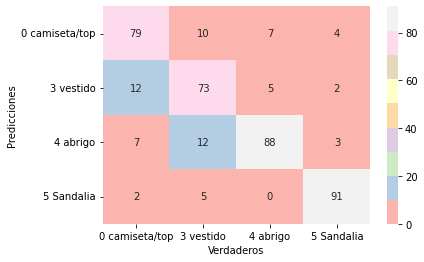

In [106]:
from sklearn.metrics import confusion_matrix
from string import ascii_uppercase
import pandas as pd
import seaborn as sns
conf=confusion_matrix(categoriasTrain,categoriasTest)
columnas=['0 camiseta/top','3 vestido','4 abrigo','5 Sandalia']
df_cm=pd.DataFrame(conf,index=columnas, columns=columnas)

grafica=sns.heatmap(df_cm,cmap='Pastel1',annot=True)
plt.ylabel('valores verdaderos')
plt.xlabel('Valores prediccion')
grafica.set(xlabel="Verdaderos",ylabel='Predicciones')
plt.show()

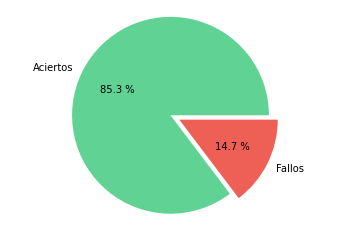

In [111]:
import matplotlib.pyplot as plt

total_aciertos=79+73+88+91
total_fallos=12+7+2+10+12+5+4+2+3;
porcentaje_acierto=total_aciertos*100/400
porcentaje_fallo=total_fallos*100/400

porcentajes = [porcentaje_acierto,porcentaje_fallo]
nombres = ["Aciertos","Fallos"]
colores = ["#60D394","#EE6055"]
desfase = ( 0, 0.1)
plt.pie(porcentajes, labels=nombres, autopct="%0.1f %%", colors=colores, explode=desfase)
plt.axis("equal")
plt.show()